### Mục tiêu bài toán (problem statement)
Chi phí chăm sóc sức khỏe đang gia tăng trên toàn cầu, với mức phí bảo hiểm y tế cá nhân thường dao động rất lớn do các yếu tố như độ tuổi, chỉ số BMI, tình trạng hút thuốc và nhiều yếu tố khác.
Sự biến động khó lường này gây khó khăn cho các công ty bảo hiểm trong việc đánh giá rủi ro một cách chính xác và thiết lập mức phí phù hợp.

Việc định giá không nhất quán có thể dẫn đến tình trạng thu phí thấp đối với các cá nhân có rủi ro cao, hoặc thu phí quá cao với những người có rủi ro thấp — từ đó ảnh hưởng đến cả lợi nhuận và tính công bằng.

Bằng cách phân tích dữ liệu bảo hiểm trong quá khứ và xây dựng các mô hình dự đoán, chúng ta có thể xác định các yếu tố chính ảnh hưởng đến chi phí và dự báo mức phí một cách chính xác hơn, qua đó thúc đẩy việc định giá dựa trên dữ liệu, tối ưu hóa phân bổ nguồn lực và nâng cao sự hài lòng của khách hàng.


In [ ]:
# Import thư viện
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Đọc dữ liệu
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Tổng quan dữ liệu

In [ ]:
# Khám phá dữ liệu
print(df.info())
print(df.describe())
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max

In [ ]:
df.isna().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [ ]:
df_numerical = df.describe().columns
df_categorical = df.describe(include="object").columns

In [ ]:
df.sex.value_counts()

,count
sex,
male,676
female,662


In [ ]:
df.children.value_counts()

,count
children,
0,574
1,324
2,240
3,157
4,25
5,18


In [ ]:
df.smoker.value_counts()


,count
smoker,
no,1064
yes,274


In [ ]:
df.region.value_counts()


,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


In [ ]:
df.groupby('smoker')['charges'].mean()


,charges
smoker,
no,8434.268298
yes,32050.231832


In [ ]:
df.groupby(['smoker', 'sex'])['charges'].mean()


smoker  sex   
no      female     8762.297300
        male       8087.204731
yes     female    30678.996276
        male      33042.005975
Name: charges, dtype: float64

In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
df.skew(numeric_only=True) # Kiểm tra độ lệch (Skewness) của các biến số

,0
age,0.055673
bmi,0.284047
children,0.938380
charges,1.515880


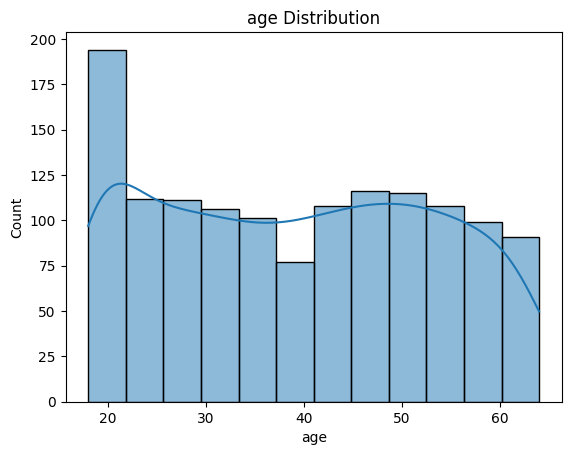

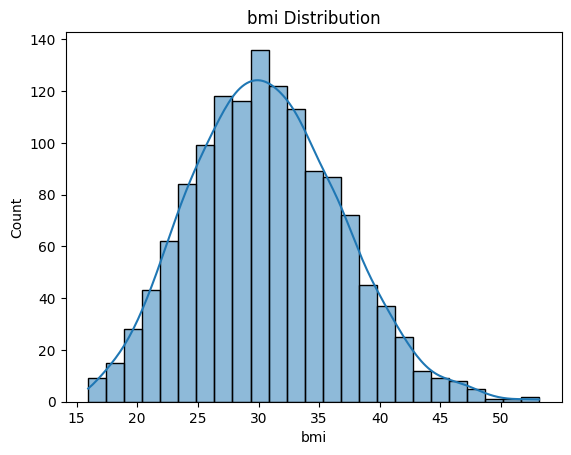

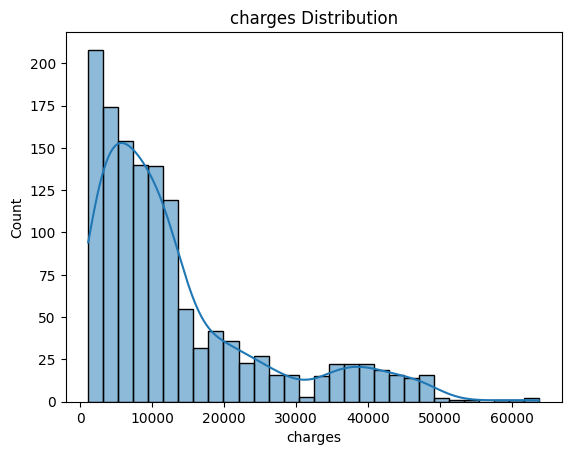

In [ ]:
cols = ['age', 'bmi','charges']
for col in cols:
    sns.histplot(x=col,data=df, kde=True)
    plt.title(f'{col} Distribution')
    plt.show()

<Axes: title={'center': 'Box plot for charges, smokers and sex'}, xlabel='charges', ylabel='smoker'>

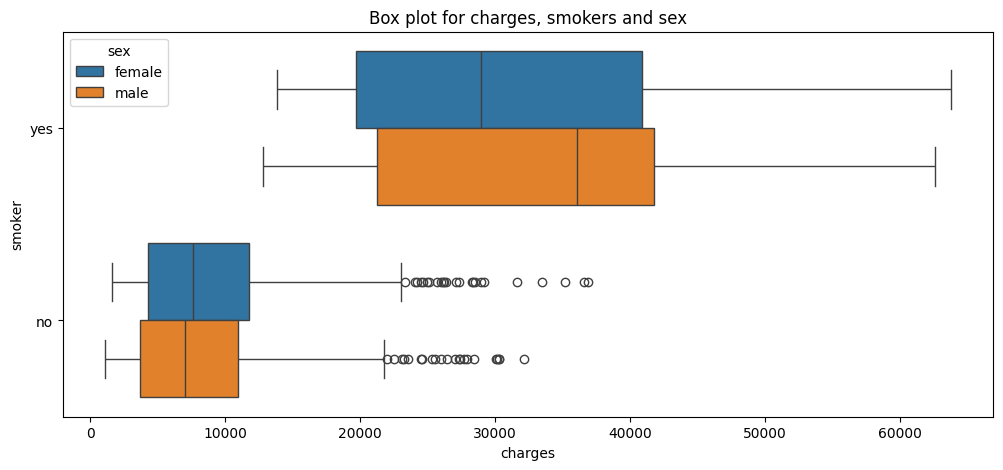

In [ ]:
plt.figure(figsize=(12,5))
plt.title('Box plot for charges, smokers and sex')
sns.boxplot(y='smoker', x='charges', data = df , orient='h', hue='sex')

 Biểu đồ phân bố Histogram cho các biến số số

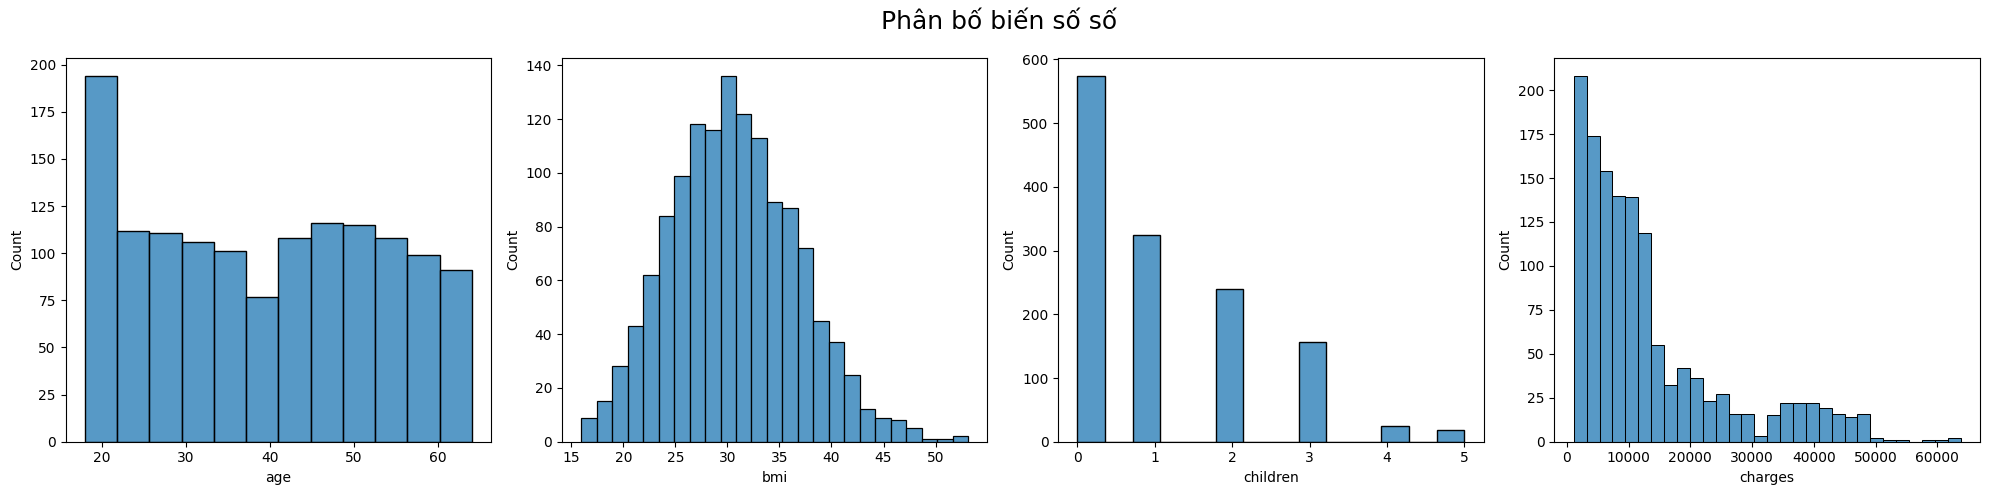

In [ ]:
# ✅ Histogram cho biến số số
fig, axs = plt.subplots(ncols=len(df_numerical), figsize=(20, 5))
for i, col in enumerate(df_numerical):
    sns.histplot(df, x=col, ax=axs[i])

plt.suptitle(" Phân bố biến số số", fontsize=18)
plt.tight_layout()
plt.show()


In [ ]:
df.describe(include="object")

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [ ]:
for i in df_categorical:
    print(f"{df[i].value_counts()}\n")

sex
male      676
female    662
Name: count, dtype: int64

smoker
no     1064
yes     274
Name: count, dtype: int64

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64



Biểu đồ phân tích hút thuốc và chi phí

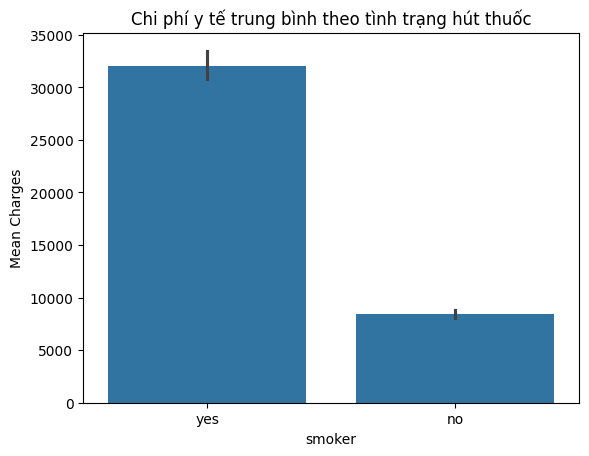

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Tạo biểu đồ
ax = sns.barplot(x='smoker', y='charges', data=df, estimator=np.mean)

# Tiêu đề và trục
plt.title('Chi phí y tế trung bình theo tình trạng hút thuốc')
plt.ylabel('Mean Charges')

# Tính trung bình và hiển thị trên đầu cột
means = df.groupby('smoker')['charges'].mean().values




In [ ]:
df.dtypes
# kiểu dữ liệu

,0
age,int64
sex,object
bmi,float64
children,int64
smoker,object
region,object
charges,float64


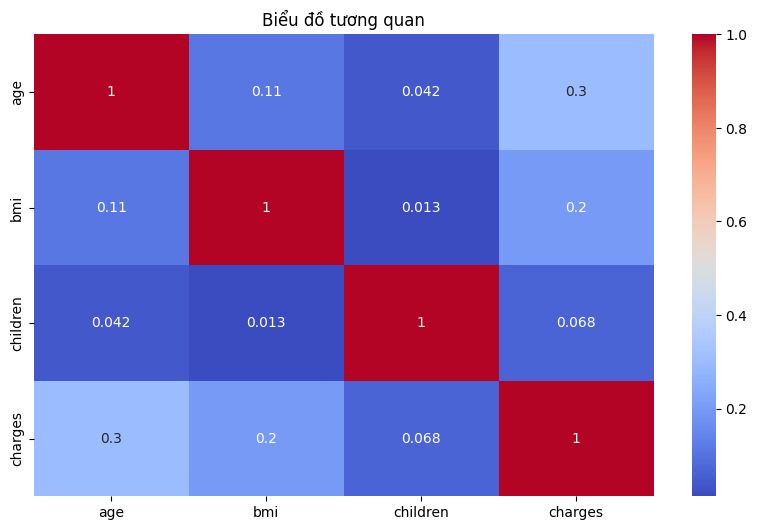

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Biểu đồ tương quan')
plt.show()


Tiền xử lý dữ liệu (Preprocessing)



In [ ]:
from sklearn.preprocessing import LabelEncoder        #  Mã hóa biến phân loại

data = df.copy()
le = LabelEncoder()
data['sex'] = le.fit_transform(data['sex'])           # male 1, femal 0
data['smoker'] = le.fit_transform(data['smoker'])     # yes 1, no 0
data['region'] = le.fit_transform(data['region'])

X = data.drop('charges', axis=1)  # Biến đầu vào
y = data['charges']               # Biến mục tiêu (chi phí)



Chia tập train/test và chuẩn hóa

In [84]:
# Chia tập train/test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() # for regression model

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns = scaler.get_feature_names_out())
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = scaler.get_feature_names_out())


ValueError: could not convert string to float: 'female'

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)


In [ ]:
X_train

,age,sex,bmi,children,smoker,region
560,46,0,19.950,2,0,1
1285,47,0,24.320,0,0,0
1142,52,0,24.860,0,0,2
969,39,0,34.320,5,0,2
486,54,0,21.470,3,0,1
...,...,...,...,...,...,...
1095,18,0,31.350,4,0,0
1130,39,0,23.870,5,0,2
1294,58,1,25.175,0,0,0
860,37,0,47.600,2,1,3


Đánh giá mô hình & Phân tích hệ số


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Tính các chỉ số đánh giá
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# In kq
print("MAE (Mean Absolute Error):", round(mae, 2))  # Trung bình sai số tuyệt đối

print("RMSE (Root Mean Squared Error):", round(rmse, 2))  # Nhấn mạnh sai số lớn

print("R² Score (Coefficient of Determination):", round(r2, 4)) # Tỷ lệ giải thích được dữ liệu

# Lấy hệ số của từng biến


coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
coeff_df.sort_values(by='Coefficient', ascending=False)


MAE (Mean Absolute Error): 4186.51
RMSE (Root Mean Squared Error): 5799.59
R² Score (Coefficient of Determination): 0.7833


,Coefficient
smoker,9557.143383
age,3616.108652
bmi,2028.308579
children,516.662566
sex,-9.392954
region,-302.387980


In [79]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import numpy as np

# 👉 Bước 1: Mã hóa dữ liệu phân loại
X_encoded = X.copy()
X_encoded['sex'] = X_encoded['sex'].map({'male': 1, 'female': 0})
X_encoded['smoker'] = X_encoded['smoker'].map({'yes': 1, 'no': 0})
X_encoded['region'] = X_encoded['region'].map({'southeast': 0, 'southwest': 1, 'northeast': 2, 'northwest': 3})

# 👉 Bước 2: Tạo pipeline: chuẩn hóa + Linear Regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LinearRegression())
])

# 👉 Bước 3: Đánh giá chéo 5-Fold với R²
r2_scores = cross_val_score(pipeline, X_encoded, y, cv=5, scoring='r2')

# 👉 Bước 4: In kết quả
print("🎯 Điểm R² từ đánh giá chéo ở từng lần gập:", r2_scores)
print("📊 Giá trị trung bình của R² qua các lần đánh giá chéo:", round(np.mean(r2_scores), 4))


🎯 Điểm R² từ đánh giá chéo ở từng lần gập: [0.76258026 0.70682745 0.77683066 0.7319328  0.75695771]
📊 Giá trị trung bình của R² qua các lần đánh giá chéo: 0.747


Kiểm tra skewness (độ lệch)

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('charges', axis=1)
y = df['charges']

# Nếu chưa xử lý biến phân loại, nên dùng get_dummies hoặc để CatBoost tự xử lý
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [ ]:
# Đảm bảo các biến phân loại là object
df['sex'] = df['sex'].astype(str)
df['smoker'] = df['smoker'].astype(str)
df['region'] = df['region'].astype(str)


In [ ]:

df['charges'].skew()


np.float64(1.5158796580240388)

In [ ]:
!pip install catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.2 MB/s eta 0:00:00


In [82]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import numpy as np

# Linear Regression với Pipeline
pipeline_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LinearRegression())
])
pipeline_lr.fit(X_train, y_train)
r2_lr = r2_score(y_test, pipeline_lr.predict(X_test))

# Decision Tree
tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train, y_train)
r2_tree = r2_score(y_test, tree.predict(X_test))

# Random Forest
forest = RandomForestRegressor(n_estimators=100, random_state=42)
forest.fit(X_train, y_train)
r2_forest = r2_score(y_test, forest.predict(X_test))

# CatBoost
catboost = CatBoostRegressor(
    iterations=1000,
    learning_rate=0.1,
    depth=6,
    loss_function='MAE',
    random_seed=42,
    verbose=0
)
catboost.fit(X_train, y_train)
r2_catboost = r2_score(y_test, catboost.predict(X_test))


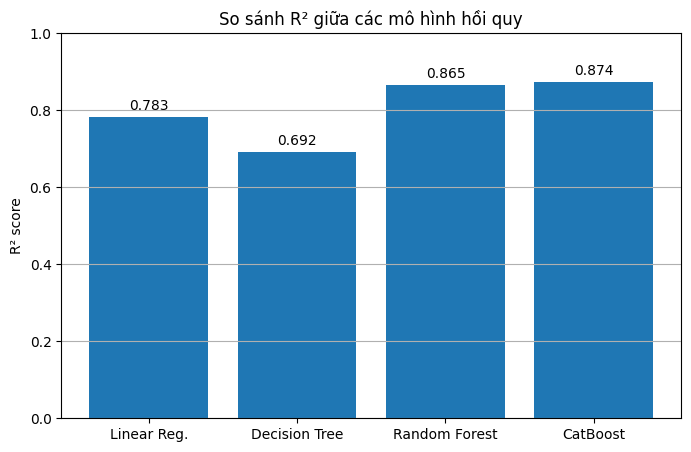

In [83]:
# Tạo dữ liệu
model_names = ['Linear Reg.', 'Decision Tree', 'Random Forest', 'CatBoost']
r2_scores = [r2_lr, r2_tree, r2_forest, r2_catboost]

# Vẽ biểu đồ
plt.figure(figsize=(8, 5))
plt.bar(model_names, r2_scores)
plt.title("So sánh R² giữa các mô hình hồi quy")
plt.ylabel("R² score")
plt.ylim(0, 1)
plt.grid(axis='y')
for i, score in enumerate(r2_scores):
    plt.text(i, score + 0.01, f"{score:.3f}", ha='center', va='bottom', fontsize=10)
plt.show()


In [80]:
print("R² Linear Regression (cross-val):", round(np.mean(r2_scores), 4))
print("R² CatBoost (test set):", round(r2_score(y_test, y_pred), 4))


R² Linear Regression (cross-val): 0.747
R² CatBoost (test set): 0.783


In [ ]:
print(len(y_test), len(y_pred))


335 268


In [ ]:
cat_features = ['sex', 'smoker', 'region']

catboost_reg.fit(X_train, y_train,
                 eval_set=(X_test, y_test),
                 cat_features=cat_features,
                 verbose=50)
y_pred = catboost_reg.predict(X_test)


0:	learn: 7536.5701752	test: 7766.5886826	best: 7766.5886826 (0)	total: 8.25ms	remaining: 8.24s
50:	learn: 1640.5931726	test: 1634.8644393	best: 1634.8644393 (50)	total: 286ms	remaining: 5.32s
100:	learn: 1477.8924621	test: 1517.3460846	best: 1517.3460846 (100)	total: 497ms	remaining: 4.43s
150:	learn: 1420.9952172	test: 1493.9820419	best: 1493.9820419 (150)	total: 810ms	remaining: 4.55s
200:	learn: 1385.4715947	test: 1492.8760576	best: 1489.1265477 (170)	total: 953ms	remaining: 3.79s
250:	learn: 1353.2528344	test: 1493.6268631	best: 1489.1265477 (170)	total: 1.06s	remaining: 3.17s
300:	learn: 1328.7214747	test: 1490.8503274	best: 1488.5855753 (297)	total: 1.28s	remaining: 2.98s
350:	learn: 1306.2606008	test: 1477.0736333	best: 1477.0736333 (350)	total: 1.54s	remaining: 2.85s
400:	learn: 1285.0030237	test: 1485.3002402	best: 1475.9048108 (362)	total: 1.76s	remaining: 2.63s
450:	learn: 1268.6646518	test: 1482.7160451	best: 1475.9048108 (362)	total: 1.93s	remaining: 2.34s
500:	learn: 124

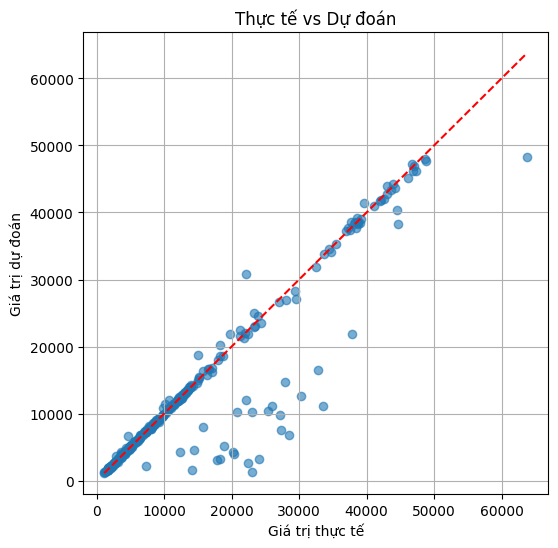

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel('Giá trị thực tế')
plt.ylabel('Giá trị dự đoán')
plt.title('Thực tế vs Dự đoán')

min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--')

plt.grid(True)
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('charges', axis=1)
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [ ]:
import joblib
joblib.dump(catboost_reg, 'catboost_model.pkl')


['catboost_model.pkl']

In [ ]:
from google.colab import files
files.download('Model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>